In [160]:
import keras

In [161]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Creating the data

In [162]:
dataset = pd.read_csv('aapl_msi_sbux.csv')
dataset.head()

,AAPL,MSI,SBUX
0,67.8542,60.30,28.185
1,68.5614,60.90,28.070
2,66.8428,60.83,28.130
3,66.7156,60.81,27.915
4,66.6556,61.12,27.775


In [163]:
#Getting the data fragments
apple = dataset.iloc[:,0].values
msi = dataset.iloc[:,1].values
starbucks = dataset.iloc[:,2].values

In [191]:
#Making the training and testing data
a_scaler = StandardScaler()
apple = a_scaler.fit_transform(apple.reshape(-1,1))
apple_x = apple[:-1,]
apple_y = apple[1:]

m_scaler = StandardScaler()
msi = m_scaler.fit_transform(msi.reshape(-1,1))
msi_x = msi[:-1,]
msi_y = msi[1:]

s_scaler = StandardScaler()
starbucks = s_scaler.fit_transform(starbucks.reshape(-1,1))
starbucks_x = starbucks[:-1,]
starbucks_y = starbucks[1:]

## Creating the forecasting model

### 1> For apple

In [165]:
apple_y = apple_y.reshape(apple_y.shape[0])
apple_x = apple_x.reshape(apple_x.shape[0],1,apple_x.shape[1])

In [166]:
#Creating the network structure
model_apple = Sequential()
model_apple.add(LSTM(1024,input_shape=(1,1)))
model_apple.add(keras.layers.Dense(1,activation = 'sigmoid'))
#Building the model
model_apple.compile(optimizer='adam',loss = 'mae')

In [167]:
x_train = apple_x[:1000,:,:]
y_train = apple_y[:1000]
x_test = apple_x[1000:,:,:]
y_test = apple_y[1000:]

In [168]:
model_apple.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
1000/1000 [==============================] - 14s 14ms/step - loss: 0.6837
Epoch 2/15
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5365
Epoch 3/15
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5254
Epoch 4/15
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5248
Epoch 5/15
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5246
Epoch 6/15
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5245
Epoch 7/15
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5241
Epoch 8/15
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5235
Epoch 9/15
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5234
Epoch 10/15
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5231
Epoch 11/15
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5228
Epoch 12/15
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5225

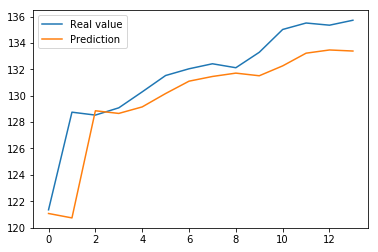

In [169]:
plt.plot(a_scaler.inverse_transform(y_test[:14]), label = 'Real value')
plt.plot(a_scaler.inverse_transform(model_apple.predict(x_test[:14])),label = 'Prediction')
plt.legend()
plt.show()

### 2> MSI stocks

In [170]:
msi_y = msi_y.reshape(msi_y.shape[0])
msi_x = msi_x.reshape(msi_x.shape[0],1,msi_x.shape[1])

In [171]:
#Creating the network structure
model_msi = Sequential()
model_msi.add(LSTM(1024,input_shape=(1,1)))
model_msi.add(keras.layers.Dense(1,activation = 'sigmoid'))
#Building the model
model_msi.compile(optimizer='adam',loss = 'mae')

In [172]:
x_train = msi_x[:1000,:,:]
y_train = msi_y[:1000]
x_test = msi_x[1000:,:,:]
y_test = msi_y[1000:]

In [174]:
model_msi.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
1000/1000 [==============================] - 11s 11ms/step - loss: 0.7348
Epoch 2/15
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5569
Epoch 3/15
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5450
Epoch 4/15
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5446
Epoch 5/15
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5444
Epoch 6/15
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5442
Epoch 7/15
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5443
Epoch 8/15
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5445
Epoch 9/15
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5442
Epoch 10/15
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5444
Epoch 11/15
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5444
Epoch 12/15
1000/1000 [==============================] - 8s 8ms/step - loss: 0.5443

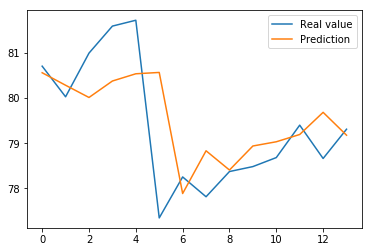

In [178]:
plt.plot(m_scaler.inverse_transform(y_test[:14]), label = 'Real value')
plt.plot(m_scaler.inverse_transform(model_msi.predict(x_test[:14])),label = 'Prediction')
plt.legend()
plt.show()

### 3> Starbucks Stocks

In [192]:
starbucks_y = starbucks_y.reshape(starbucks_y.shape[0])
starbucks_x = starbucks_x.reshape(starbucks_x.shape[0],1,starbucks_x.shape[1])

In [195]:
#Creating the network structure
model_sbux = Sequential()
model_sbux.add(LSTM(1024,input_shape=(1,1)))
model_sbux.add(keras.layers.Dense(1,activation = 'sigmoid'))
#Building the model
model_sbux.compile(optimizer='adam',loss = 'mae')

In [196]:
x_train = starbucks_x[:1000,:,:]
y_train = starbucks_y[:1000]
x_test = starbucks_x[1000:,:,:]
y_test = starbucks_y[1000:]

In [197]:
model_sbux.fit(x_train, y_train, batch_size=10, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 14s 14ms/step - loss: 0.8017
Epoch 2/5
1000/1000 [==============================] - 8s 8ms/step - loss: 0.6320
Epoch 3/5
1000/1000 [==============================] - 8s 8ms/step - loss: 0.6223
Epoch 4/5
1000/1000 [==============================] - 8s 8ms/step - loss: 0.6218
Epoch 5/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.6220


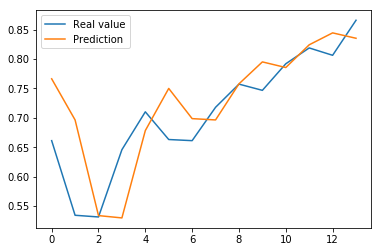

In [198]:
plt.plot(s_scaler.inverse_transform(y_test[:14]), label = 'Real value')
plt.plot(s_scaler.inverse_transform(model_sbux.predict(x_test[:14])),label = 'Prediction')
plt.legend()
plt.show()